In [1]:
!pip install matplotlib

In [14]:
%matplotlib inline
from Bio.Seq import Seq
import random
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import os
os.makedirs("images", exist_ok=True)

### Amino acid mapping & random sequence generation

In [15]:
# Mapping for full names
aa_names = { "A": "Alanine","C": "Cysteine","D": "Aspartic acid", "D": "Aspartic acid", "D": "Aspartic acid",
             "E": "Glutamic acid", "F": "Phenylalanine", "G": "Glycine", "H": "Histidine","I": "Isoleucine",
             "K": "Lysine", "L": "Leucine", "M": "Methionine", "N": "Asparagine", "P": "Proline",
              "Q": "Glutamine","R": "Arginine", "S": "Serine",  "T": "Threonine", "V": "Valine", "W": "Tryptophan",
             "Y": "Tyrosine"}

# Fixed order of amino acids
aa_order = list(aa_names.keys())

# Random sequence
random.seed(42)
seq_length = 200
protein_seq_str = "".join(random.choices(aa_order, k=seq_length))
protein_seq = Seq(protein_seq_str)

print("Sequence length:", len(protein_seq))
print("First 100 chars:", str(protein_seq)[:100])


Sequence length: 200
First 100 chars: PAGFRQVCKAFMAEPMFNTATQHEYHCCTPTRMYINTPVNRAFGCFDGPIIFGWPPEREIYPNQTSFAHGFWVHQIWLGFNGNVIFYMCADPSKCIYMYV


### Count amino acids 

In [16]:
counts = Counter(protein_seq)
values = [counts.get(aa, 0) for aa in aa_order]

# Print counts with full names
for aa, v in zip(aa_order, values):
    print(f"{aa_names[aa]} ({aa}): {v}")


Alanine (A): 10
Cysteine (C): 14
Aspartic acid (D): 6
Glutamic acid (E): 8
Phenylalanine (F): 20
Glycine (G): 12
Histidine (H): 9
Isoleucine (I): 7
Lysine (K): 11
Leucine (L): 6
Methionine (M): 12
Asparagine (N): 9
Proline (P): 14
Glutamine (Q): 7
Arginine (R): 7
Serine (S): 7
Threonine (T): 9
Valine (V): 13
Tryptophan (W): 9
Tyrosine (Y): 10


### Cumulative Line Plot

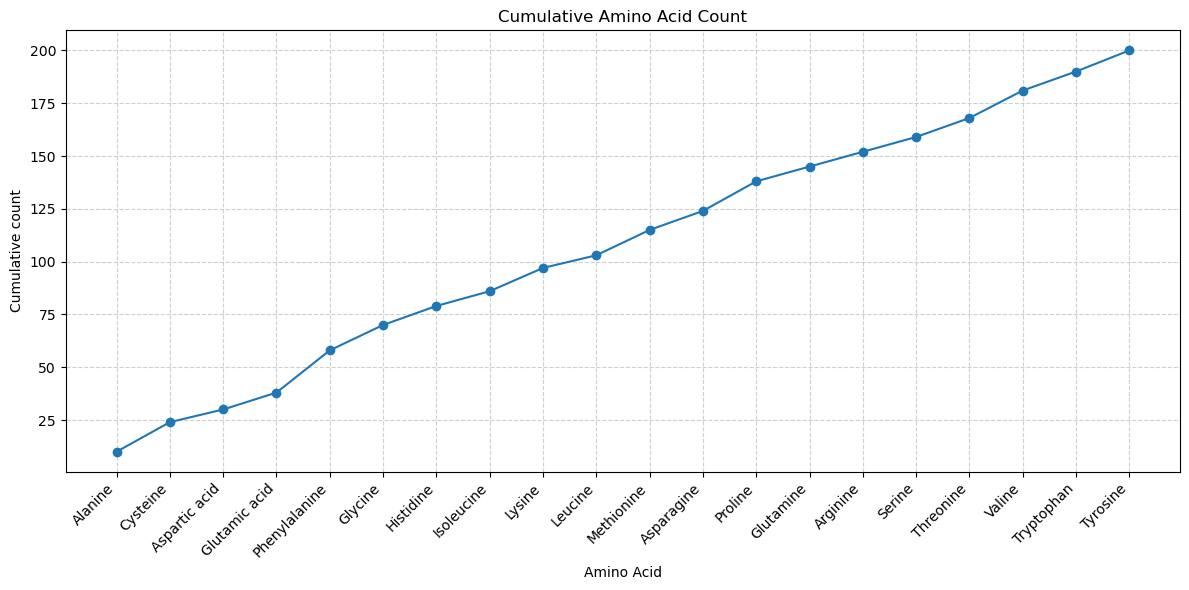

In [19]:
cumulative = np.cumsum(values)

plt.figure(figsize=(12,6))
plt.plot([aa_names[aa] for aa in aa_order], cumulative, marker='o', linestyle='-')
plt.title("Cumulative Amino Acid Count")
plt.xlabel("Amino Acid")
plt.ylabel("Cumulative count")
plt.xticks(rotation=45, ha="right")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.savefig("images/aa_cumulative_plot.png", dpi=300, bbox_inches='tight')
plt.show()


### Bar Chart

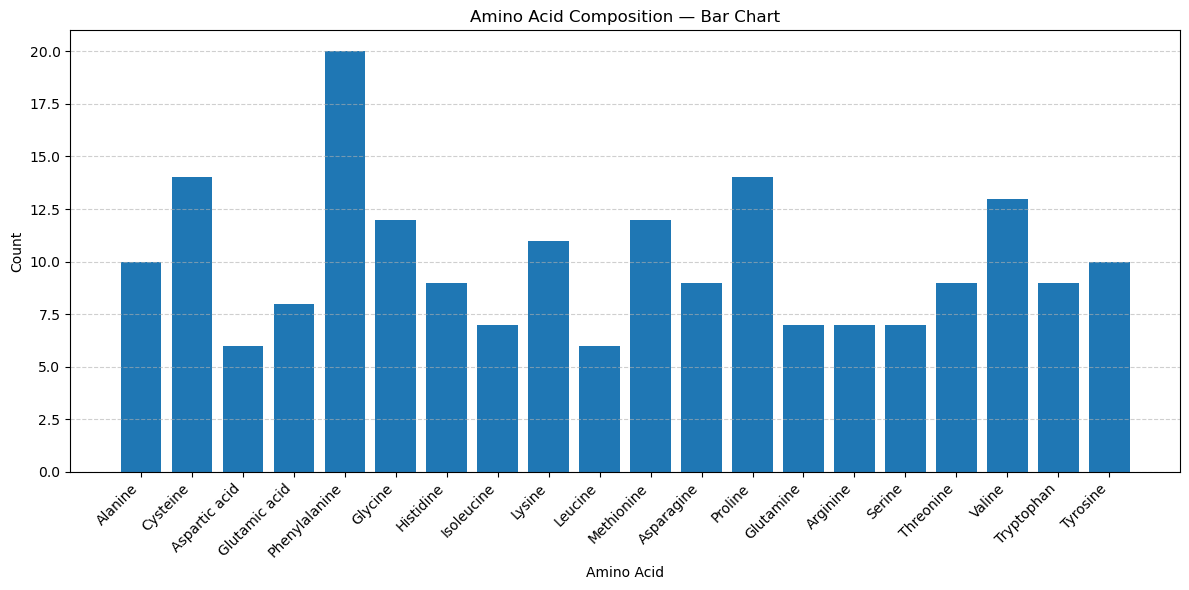

In [18]:
plt.figure(figsize=(12,6))
plt.bar([aa_names[aa] for aa in aa_order], values)
plt.title("Amino Acid Composition — Bar Chart")
plt.xlabel("Amino Acid")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.savefig("images/aa_bar_chart.png", dpi=300, bbox_inches='tight')
plt.show()


### Pie Chart 

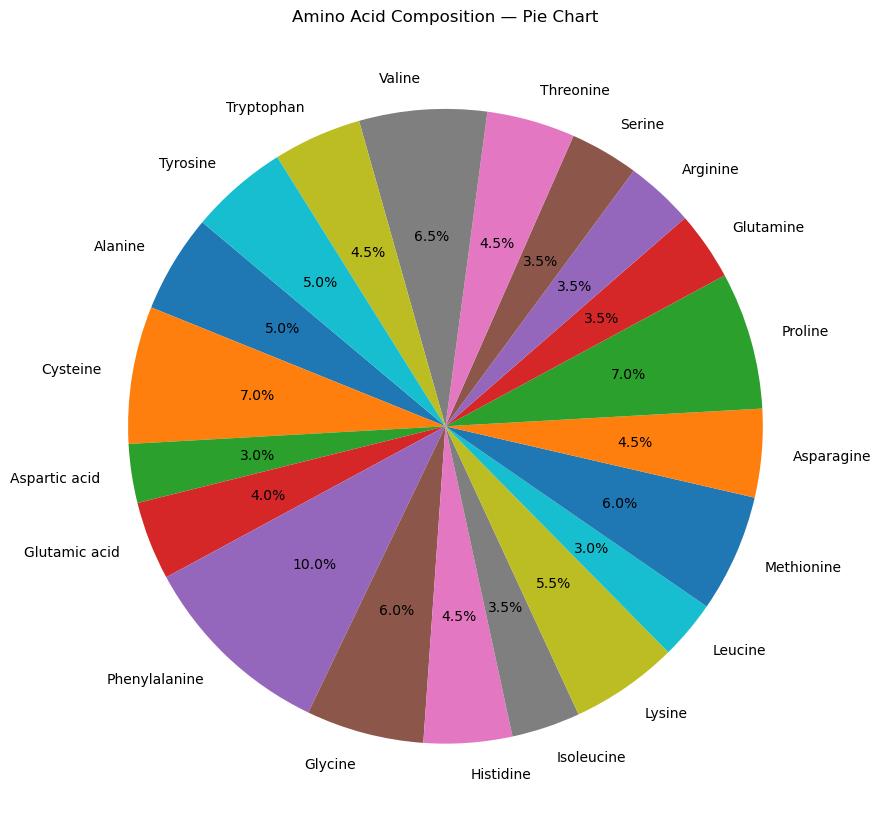

In [20]:
plt.figure(figsize=(9,9))
plt.pie(values, labels=[aa_names[aa] for aa in aa_order], autopct='%1.1f%%', startangle=140)
plt.title("Amino Acid Composition — Pie Chart")
plt.tight_layout()

plt.savefig("images/aa_pie_chart.png", dpi=300, bbox_inches='tight')
plt.show()
